<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


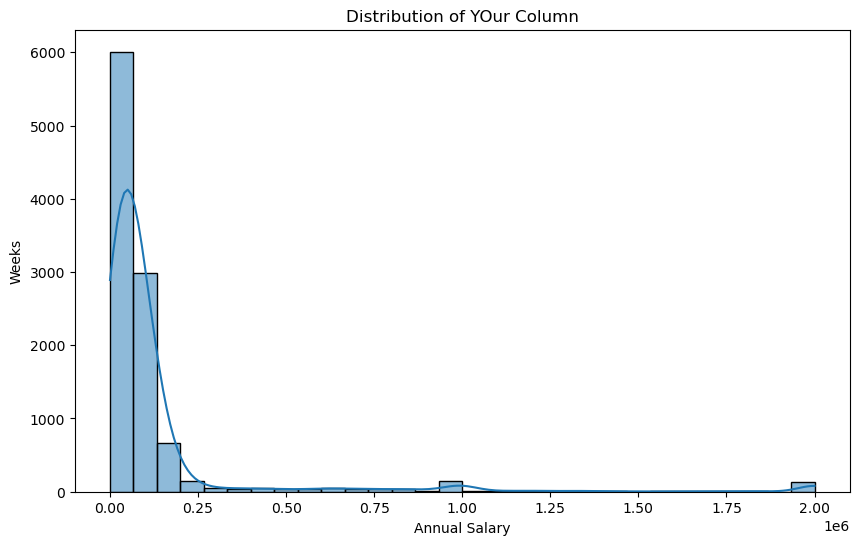

In [6]:
# your code goes here
plt.figure(figsize=(10,6))
sns.histplot(df['ConvertedComp'], kde=True, bins=30)
plt.title('Distribution of YOur Column')
plt.xlabel('Annual Salary')
plt.ylabel('Weeks')
plt.show()

Plot the histogram for the column `ConvertedComp`.


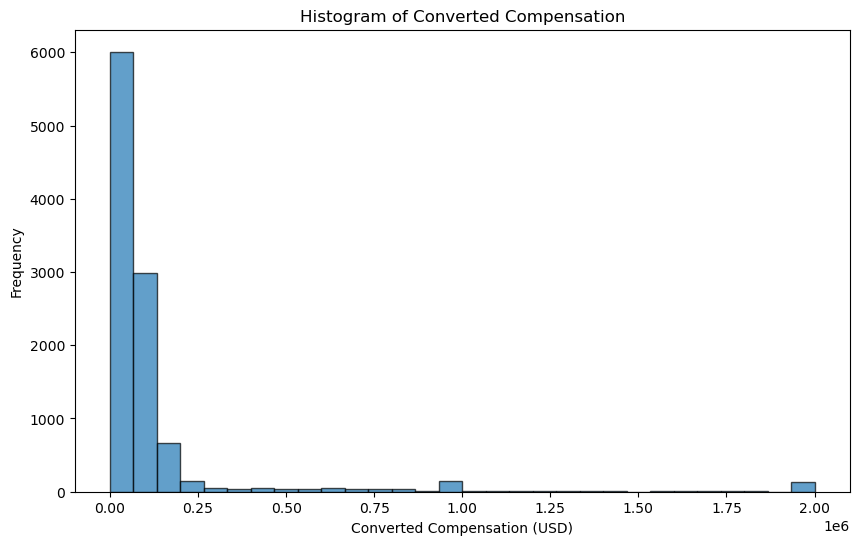

In [7]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
median_converted_comp=df['ConvertedComp'].median()
print("The median of the ConvertedComp column is:", median_converted_comp)

The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
num_men=df[df['Gender']=='Man'].shape[0]
print("The number of responders who identified themselves as a 'Man' is:", num_men)

The number of responders who identified themselves as a 'Man' is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
women_df=df[df['Gender']=='Woman']
median_converted_comp_women=women_df['ConvertedComp'].median()
print("The median ConvertedComp of responders who identified themselves as 'Woman' is:", median_converted_comp_women)

The median ConvertedComp of responders who identified themselves as 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# your code goes here
five_number_summary=df['Age'].describe(percentiles=[0.25, 0.5, 0.75])
min_age = five_number_summary['min']
q1_age = five_number_summary['25%']
median_age = five_number_summary['50%']
q3_age = five_number_summary['75%']
max_age = five_number_summary['max']

print("Five-number summary for the 'Age' column:")
print(f"Minimum: {min_age}")
print(f"Q1: {q1_age}")
print(f"Median: {median_age}")
print(f"Q3: {q3_age}")
print(f"Maximum: {max_age}")

Five-number summary for the 'Age' column:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


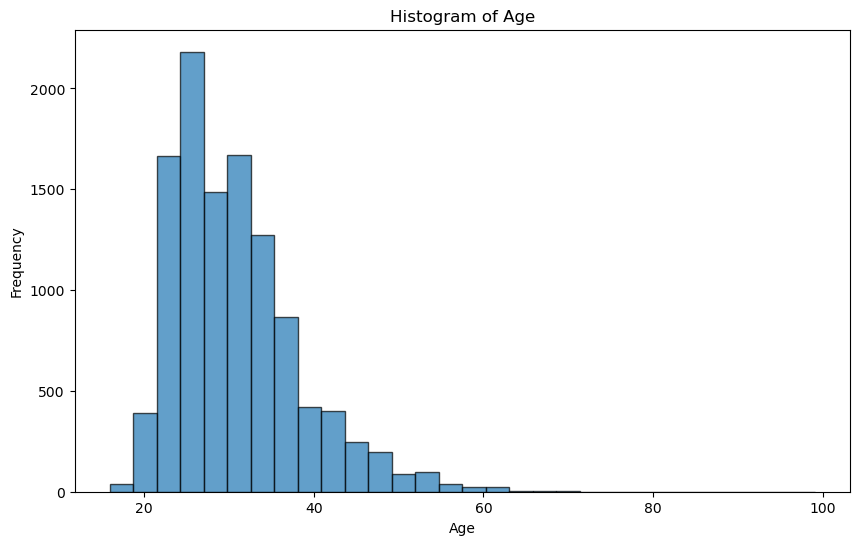

In [12]:
# your code goes here
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


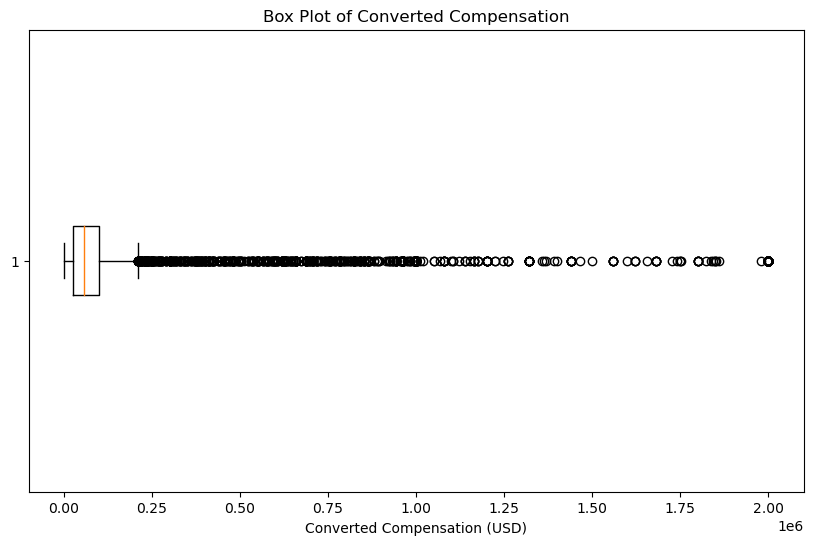

In [13]:
# your code goes here
plt.figure(figsize=(10,6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("The interquartile range is:", IQR)

The interquartile range is: 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

outlier_count = outliers.shape[0]

print("Number of outliers in ConvertedComp:", outlier_count)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("New DataFrame without outliers:")
print(df_no_outliers)

New DataFrame without outliers:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
# your code goes here
correlations = df_no_outliers.corr()['Age']
print(correlations)

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64


C:\Users\brown\AppData\Local\Temp\ipykernel_14172\778836889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_no_outliers.corr()['Age']


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
